In [5]:
import xarray as xr
import numpy as np
#import glob
import matplotlib.pyplot as plt
import gsw
import tables
import pandas as pd
import itertools
from netCDF4 import Dataset,num2date, date2num
import glob
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 3)))
colorA=next(colors)
colorC=next(colors)
colorB=next(colors)

In [2]:
plot_clusters = [2, 4]
cluster_names = {2:'Shallows', 4:'Canyons'}
cluster_color = {2:colorA, 4:colorB}

In [3]:
datapath = '/home/amh001/space_fs7/DATA/NEP36-CanOE/'

#MLD=[]
def getMLD(cluster_id):
    store = pd.HDFStore(datapath+'stratification/Clusters_MLD_t02'+str(1996)+'.h5', mode='r')
    MLD=store['/DF_'+str(cluster_id)].squeeze()
    TIME=store['/DF_'+str(cluster_id)].index
    #print(np.shape(MLD), np.shape(TIME))
    for YEAR in np.arange(1997,2020):
        store = pd.HDFStore(datapath+'stratification/Clusters_MLD_t02'+str(YEAR)+'.h5', mode='r')
        #print(store.keys())

        MLD=np.hstack((MLD,store['/DF_'+str(cluster_id)].squeeze()))
        TIME=np.hstack((TIME,store['/DF_'+str(cluster_id)].index))

        store.close()
    return TIME, MLD

In [6]:
#now load the cluster data to find rho bottom
cluster_data_path = '/home/amh001/space_fs7/DATA/NEP36-CanOE/'
clusters_ds=[]
for ii in range(6):
    cluster_files = sorted(glob.glob(f'{cluster_data_path}/From_Andrew//processed/daily/by_year/by_cluster/n_clusters_6/cluster_{ii}*.nc')) 
    #print(cluster_files    )
    cluster_ds =xr.open_mfdataset(cluster_files, chunks={'time':439}, engine='h5netcdf')
    clusters_ds.append(cluster_ds)

In [7]:
def deseason(monthly_des, seas):

    num=12
    #print(monthly_des.shape, seas.shape)
    ii0=0
    ii=12
    #print(len(monthly_des))
    while ii <=len(monthly_des):  
        #print(ii0, ii)
        monthly_des[ii0:ii]=monthly_des[ii0:ii]-seas
        ii0=ii
        ii=ii+12
    
    #monthly_des[-1]=monthly_des[-2]#-seas['HeatC'].values[0]
    return monthly_des
def get_deseasoned_plot(cluster, var, color, label, linestyle):
    #cluster=cluster_ds.sel(time=slice('1996-01-01T12:00:00', '2019-12-31T12:00:00'))
    ds_months = cluster.groupby('time.month').mean()
   # print(ds_months)
    monthly=cluster.resample(time='1MS').mean(dim='time')
    X=deseason(monthly.values,ds_months.values)
  #  print(np.shape(X))
   # X0=np.mean(X)
    print(ds_months)
    plt.plot(monthly.time.values, X/np.std(X), color=color, label=label, linestyle=linestyle)

depths 262.8805803045675 MLD 165.05727 0.6278792676283654
depths 63.339926711807536 MLD 74.35624 1.1739236715123402
depths 716.7499778953759 MLD 134.94414 0.18827225913488624
depths 28.902779191472252 MLD 36.275795 1.2550971220654554
depths 151.1059828218167 MLD 124.60847 0.8246428418985128
depths 101.1585130954427 MLD 105.76585 1.0455456789153446


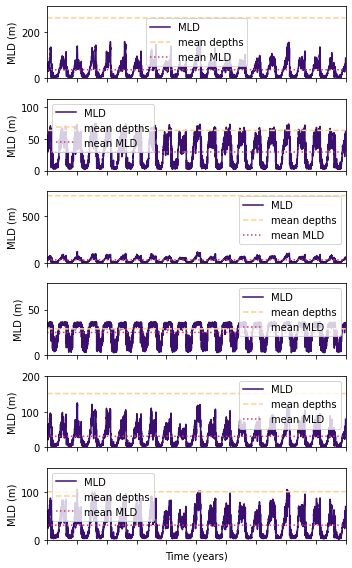

In [12]:
fig1=plt.figure(figsize=(5,8))
for cluster_id in np.arange(6):                
    ax=fig1.add_subplot(6,1,cluster_id+1)
    #cluster_id=plot_clusters[0]
    T1=clusters_ds[cluster_id].time.values
    DEPTHS=clusters_ds[cluster_id].depths.mean().values
    #print(clusters_ds[cluster_id].depths)
    TIME,MLD=getMLD(cluster_id)
    #print(np.shape(MLD), TIME[0], TIME[-1], T1[0] ,T1[8765])
    ratio=((MLD)/(clusters_ds[cluster_id].depths[:8766].mean(axis=1))).max().values

    plt.plot(TIME, MLD, color=colorA, label='MLD')
    print('depths', DEPTHS, 'MLD', MLD.max(), ratio)
    plt.plot(TIME, np.ones(len(TIME))*DEPTHS, color=colorB,linestyle='--', label='mean depths')
    plt.plot(TIME, np.ones(len(TIME))*MLD.mean(), color=colorC,linestyle=':', label='mean MLD')

    ax.set_xlabel('')
    ax.set_xticklabels([])
    plt.legend()
    X=ax.get_xticks()
    #print(X)
    plt.title('')
    plt.ylim([0,DEPTHS+50])
    plt.xlim([X[1], X[-2]])
    plt.ylabel(r'MLD (m)')
plt.xlabel('Time (years)')
plt.tight_layout()
plt.savefig('../Figures/clusters_MLD.png', format='png', bbox_inches='tight',transparent=False,dpi=500)  

depths 262.8805803045675 MLD 165.05727 ratio1 0.6278792676283654 0.14125788848415965 0.6278792676283654
depths 63.339926711807536 MLD 74.35624 ratio1 1.1739236715123402 0.4624810269392566 1.1739236715123402
depths 716.7499778953759 MLD 134.94414 ratio1 0.18827225913488624 0.04486950455011688 0.18827225913488624
depths 28.902779191472252 MLD 36.275795 ratio1 1.2550971220654554 0.865308954306598 1.2550971220654554
depths 151.1059828218167 MLD 124.60847 ratio1 0.8246428418985128 0.20803797477282437 0.8246428418985128
depths 101.1585130954427 MLD 105.76585 ratio1 1.0455456789153446 0.30431963990539707 1.0455456789153446


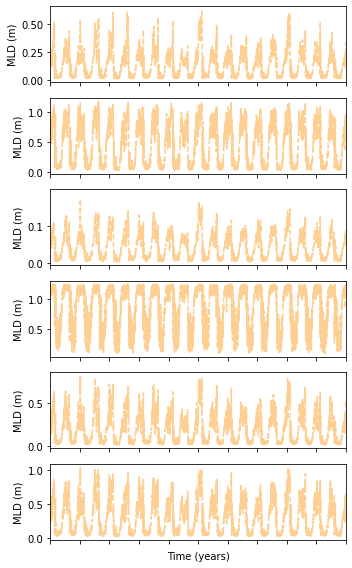

In [9]:
fig1=plt.figure(figsize=(5,8))
for cluster_id in np.arange(6):                
    ax=fig1.add_subplot(6,1,cluster_id+1)
    #cluster_id=plot_clusters[0]
    T1=clusters_ds[cluster_id].time.values
    DEPTHS=clusters_ds[cluster_id].depths.mean().values
    #print(clusters_ds[cluster_id].depths)
    TIME,MLD=getMLD(cluster_id)
    #print(np.shape(MLD), TIME[0], TIME[-1], T1[0] ,T1[8765])
    ratio=((MLD)/(clusters_ds[cluster_id].depths[:8766].mean(axis=1)))

    #plt.plot(TIME, MLD, color=colorA, label='Shallows')
    print('depths', DEPTHS, 'MLD', MLD.max(), 'ratio1', MLD.max()/DEPTHS, ratio.mean().values, ratio.max().values)
    plt.plot(TIME, ratio.values, color=colorB,linestyle='--', label='Shallows')
    #plt.plot(TIME, np.ones(len(TIME))*MLD.mean(), color=colorC,linestyle=':', label='Shallows')

    ax.set_xlabel('')
    ax.set_xticklabels([])
    
    X=ax.get_xticks()
    #print(X)
    plt.title('')
    #plt.ylim([0,DEPTHS+50])
    plt.xlim([X[1], X[-2]])
    plt.ylabel(r'MLD (m)')
plt.xlabel('Time (years)')
plt.tight_layout()
#plt.savefig('../Figures/clusters_MLD.png', format='png', bbox_inches='tight',transparent=False,dpi=500)  

create a dataframe to generate the deseasoned plots. 